# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

to do list

- ~create a data cleaning function ()~
- ~principle component analysis~ 
- use different data imputing method for the data 
- ~code-refraction to make it easier~
- include sklearn pipeline/customized transfer functions
- create a separate data cleaning pipleine for mailout data

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling 
from helper import *
%matplotlib inline

In [2]:
def feature_count(azdias_features):
    print( 'Demographics data file contains {:} features'.format(len(azdias.columns)))

In [3]:
def get_features( feat_summary, typ , azdias = None):
    """Get the features as per feature type
    """
    cat_cols = feat_summary.loc[ feat_summary['type'] ==  typ, 'Attribute'].values
    
    if azdias is None:
        cat_cols = cat_cols
    else:
        cat_cols = np.intersect1d(cat_cols, azdias.columns)
        
    return cat_cols

In [4]:
def data_cleaning(df, feat_summary, nan_threshold, features_to_keep):
    """clean data frame, drop redundant columns/rows
    Args: 
        df:  input data frame 
        feat_summary: meta data summary 
        nan_theshold (float): threshold for dropping rows and columns, if the ratio of nan exceedes it(<1)

    Retruns:
        df(pd.DataFrame): pandas dataframe withe reduced dimension
    """
    # drop attributes not explained in meta data file
    print('# step 1: drop attributes not explained in meta data file ')
#     features_to_keep = np.intersect1d(df.columns, feat_summary.Attribute)
    df = df[features_to_keep].copy()
#     feature_count(df)

    # Update NaN according feat-summary
    print('# step 2: replace missing values or unknowns as np.nan')
    df = unkown_mapping(df, feat_summary)
    # Unknown of some features are encoded as 'X' or 'XX', replace them as np.nan, we will convert the others
    df.replace(['X', 'XX'], np.nan, inplace=True)

#     # Drop nan if portion exceedes the threshold
#     print('# step 3: drop columns and rows mostly nan\'s')
#     df = drop_columns(df, threshold=nan_threshold)
#     df = drop_rows(df, threshold=nan_threshold)

    return df

In [5]:
def print_pca(pca_df, pca_n, n):
    """based on the outcomes of PCA, print the mostly and least weighte of the i-th PCA

    Args: 
        pca_df (dataframe): outcomes of PCA with pca in rows and features in columns 
        pca_n (int): the (i+1)-th component to print
        n (int): features to include in summary table 

    Returns:
        None
    """

    # Highest
    print("PCA {:}".format(pca_n))
    print("{:} attributes with the HIGHEST weight".format(n))
    pca1 = pca_df.loc[pca_n].sort_values(
        ascending=False).head(n).reset_index().copy()
    pca1.columns = ['Attribute', 'Weight']
    pca1['Description'] = pca1['Attribute'].apply(
        lambda x: lookup_description(df_features, x))
    display(pca1)

    # Lowset
    print("{:} attributes with the LOWEST weight".format(n))
    pca2 = pca_df.loc[pca_n].sort_values(
        ascending=False).tail(n).reset_index().copy()
    pca2.columns = ['Attribute', 'Weight']
    pca2['Description'] = pca2['Attribute'].apply(
        lambda x: lookup_description(df_features, x))
    display(pca2)

# Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

In [6]:
# load in the data

In [223]:
dtype={'CAMEO_DEUG_2015': 'object', 'CAMEO_INTL_2015': 'object'}

In [224]:
customers = pd.read_csv(
    './data/Udacity_CUSTOMERS_052018.csv', sep=';',  dtype= dtype, nrows=5000)

In [225]:
customers.columns

Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1',
       'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV',
       ...
       'VK_ZG11', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP',
       'PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB'],
      dtype='object', length=369)

In [226]:
azdias = pd.read_csv('./data/Udacity_AZDIAS_052018.csv',
                     sep=';', dtype = dtype, nrows=5000 )

del azdias['LNR']

In [227]:
azdias

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1,4.0,19.0,NaN,NaN,NaN,NaN,19.0,2.0,0.0,...,1.0,2.0,3.0,7.0,6.0,4.0,3.0,4,2,1
4996,-1,1.0,14.0,NaN,NaN,NaN,NaN,14.0,1.0,0.0,...,2.0,2.0,3.0,3.0,3.0,9.0,7.0,3,2,4
4997,-1,9.0,15.0,16.0,NaN,NaN,NaN,15.0,2.0,0.0,...,4.0,3.0,6.0,4.0,1.0,9.0,1.0,1,1,3
4998,-1,1.0,12.0,NaN,NaN,NaN,NaN,12.0,2.0,1.0,...,3.0,NaN,NaN,NaN,6.0,9.0,1.0,3,2,1


In [228]:
mailout_train.columns

Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1',
       'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV',
       ...
       'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'WOHNLAGE', 'ZABEOTYP', 'RESPONSE', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB'],
      dtype='object', length=367)

## meta data summary

I will first load the 'DIAS Attributes - Values 2017.xlsx' to understand how the missing or unkonwn values are handled in the data set. 

- determine columns or features to keep

- Assign missing or unknown codes
    - The values for 'unknown', 'unknown / no main age detectable', 'no transactions known' or 'no transaction known' where used to define these codes.
    
- identify the data types

meta data summary is completed in a different notebook. Hereby, we will load the summary csv file and make use of the information

In [229]:
feat_summary = pd.read_pickle('feat_summary.pkl')
feat_summary.head()

,Attribute,type,Value
0,AGER_TYP,categorical,[-1]
1,ALTERSKATEGORIE_GROB,categorical,"[-1, 0]"
2,ALTER_HH,ordinal,[0]
3,ANREDE_KZ,categorical,"[-1, 0]"
4,ANZ_HAUSHALTE_AKTIV,numerical,0


In [230]:
feat_summary.loc[feat_summary["Attribute"] =='OST_WEST_KZ']

,Attribute,type,Value
273,OST_WEST_KZ,categorical,[-1]


##  drop columns not explained in the meta data file 

In [231]:
# Update: to keep the features, or else it may cause feature drain, investigate the values 

# features_to_keep = np.intersect1d(azdias.columns, feat_summary.Attribute)
# azdias = azdias[features_to_keep]  
# print( 'demographic data file contains {:} features'.format(len(azdias.columns)))

In [240]:
cols_not_explained = np.setdiff1d(azdias.columns, feat_summary.Attribute)
print("there are in total {:} features not expalined in the meta data file".format(len(cols_not_explained)))

there are in total 99 features not expalined in the meta data file


In [241]:
azdias[cols_not_explained].describe()

,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_KINDER,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,CJT_KATALOGNUTZER,...,STRUKTURTYP,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERDICHTUNGSRAUM,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11
count,4380.000000,3320.000000,432.000000,161.000000,37.000000,1.0,4380.000000,4267.000000,4242.000000,4972.000000,...,4241.000000,4233.000000,4233.000000,4380.000000,4241.000000,4380.000000,4101.000000,4367.000000,4367.00000,4367.000000
mean,4.456393,13.835241,11.706019,13.571429,14.648649,10.0,0.155479,7.421608,3.168317,3.380732,...,2.530064,3.220647,3.997165,0.097032,4.745107,0.450000,2.388198,6.007786,7.57362,5.995878
std,3.623043,5.081644,4.190273,3.268628,2.859839,NaN,0.500997,12.854705,1.012283,1.489470,...,0.755548,1.240457,1.109544,0.296035,8.766890,1.163898,1.184657,2.845371,3.23071,2.758734
min,1.000000,0.000000,2.000000,5.000000,8.000000,10.0,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,1.000000,11.000000,8.000000,11.000000,13.000000,10.0,0.000000,1.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,3.000000,6.00000,4.000000
50%,3.000000,15.000000,12.000000,14.000000,16.000000,10.0,0.000000,4.000000,3.000000,4.000000,...,3.000000,3.000000,4.000000,0.000000,1.000000,0.000000,2.000000,6.000000,8.00000,6.000000
75%,9.000000,17.000000,15.000000,17.000000,17.000000,10.0,0.000000,9.000000,4.000000,5.000000,...,3.000000,4.000000,5.000000,0.000000,5.000000,0.000000,3.000000,8.500000,10.00000,8.000000
max,9.000000,25.000000,18.000000,18.000000,18.000000,10.0,4.000000,292.000000,9.000000,5.000000,...,3.000000,5.000000,5.000000,1.000000,45.000000,5.000000,4.000000,11.000000,13.00000,11.000000


In [244]:
azdias[cols_not_explained].isna().mean()

AKT_DAT_KL              0.1240
ALTERSKATEGORIE_FEIN    0.3360
ALTER_KIND1             0.9136
ALTER_KIND2             0.9678
ALTER_KIND3             0.9926
                         ...  
VHA                     0.1240
VHN                     0.1798
VK_DHT4A                0.1266
VK_DISTANZ              0.1266
VK_ZG11                 0.1266
Length: 99, dtype: float64

In [246]:
cols_not_explained

array(['AKT_DAT_KL', 'ALTERSKATEGORIE_FEIN', 'ALTER_KIND1', 'ALTER_KIND2',
       'ALTER_KIND3', 'ALTER_KIND4', 'ANZ_KINDER',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ARBEIT', 'CAMEO_DEU_2015',
       'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2',
       'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6',
       'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL',
       'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST',
       'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV',
       'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN',
       'D19_HANDWERK', 'D19_HAUS_DEKO', 'D19_KINDERARTIKEL',
       'D19_KONSUMTYP_MAX', 'D19_KOSMETIK', 'D19_LEBENSMITTEL',
       'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG',
       'D19_RATGEBER', 'D19_REISEN', 'D19_SAMMELARTIKEL', 'D19_SCHUHE',
       'D19_SONSTIGE', 'D19_SOZIALES', 'D19_TECHNIK', 'D19_TELKO_MOBILE',
       'D19_TELKO_ONLINE_QUOTE_12', 'D19_TELKO_

In [247]:
# azdias[cols_not_explained].isnumeric()

## convert missing values or unknowns to 'nan's'

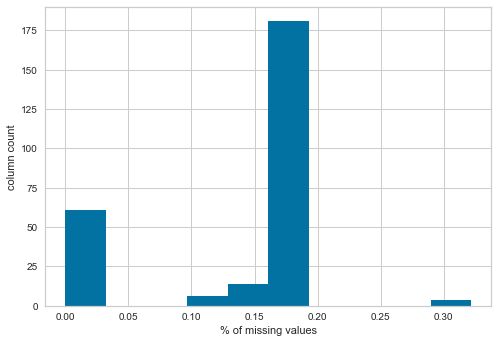

In [212]:
# hist before updating the dataframe
hist_nan(azdias, axis=0)

In [213]:
azdias = unkown_mapping(azdias, feat_summary)

C:\ProgramData\Anaconda3\Lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


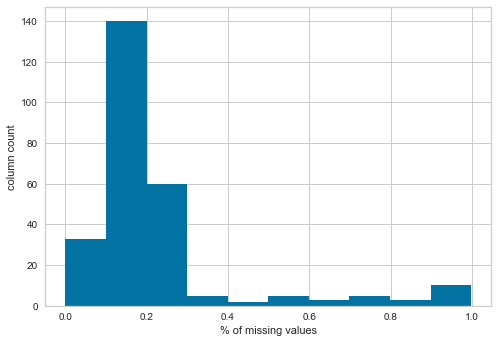

In [214]:
# Histgram after updating the unknown/missing vlaue encoding
hist_nan(azdias, axis=0)

In [215]:
# Check if the dataframe still contain any strings or any other non-numeric values 
for col in azdias.columns:
    if any(isinstance(y,(str)) for y in azdias[col].unique()):  
        print('{:}, {:}'.format( col , azdias[col].unique()))

CAMEO_DEUG_2015, [nan '8' '4' '2' '6' '1' '9' '5' '7' '3' 'X']
OST_WEST_KZ, [nan 'W' 'O']


In [216]:
# Unknown of some features are encoded as 'X' or 'XX', replace them as np.nan, we will convert the others 
azdias.replace(['X','XX'], np.nan, inplace=True)

C:\ProgramData\Anaconda3\Lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [217]:
azdias.to_pickle('azdias.pkl')

##  Drop rows that have large number of missing

distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. 

In [218]:
threshold = 0.3
azdias = drop_columns(azdias, threshold = 0.6)
azdias = drop_rows(azdias, threshold = 0.6)
feature_count(azdias)

Demographics data file contains 245 features


In [219]:
col_to_keep = azdias.columns

In [220]:
len(col_to_keep)

245

## replace nan's 

### Imputing, replace the nan's with either the mean median or mode

In [24]:
## Summary of nans for  each column
# NaN count in columns where
azdias_nan  = azdias.isna().mean() * 100 #portion of NaN
azdias_nan_ = azdias_nan.loc[azdias_nan>0]

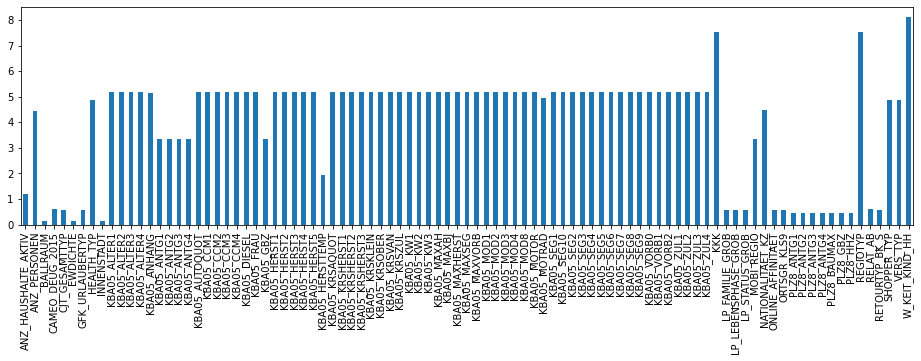

In [25]:
azdias_nan_.plot(kind = 'bar', figsize = (16,4))

#### Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. 

- For numeric and interval data, these features needs to be scaled 
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes). -> to be scaled
- Special handling may be necessary for the remaining two variable types: categorical
- Mixed data is also treated the same way as cat-data

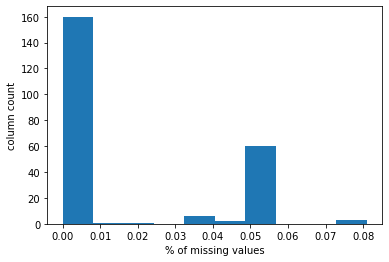

In [26]:
hist_nan(azdias)

In [27]:
for col in azdias.columns:
    if any(isinstance(y,(str)) for y in azdias[col].unique()):  
        print('{:}, {:}'.format( col , azdias[col].unique()))

CAMEO_DEUG_2015, ['8' '4' '2' '6' '1' '9' '5' '7' '3' nan]
OST_WEST_KZ, ['W' 'O']


#### Imputing missing value

In [28]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [29]:
# Replace NaN using the most frequent item in each column
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

azdias_transformed = pd.DataFrame(imp.fit_transform(azdias))
azdias_transformed.columns= azdias.columns
azdias_transformed.index=azdias.index

#### handle cat features

In [30]:
to_label_encoder = ["OST_WEST_KZ"]

In [31]:
le = preprocessing.LabelEncoder()

for col in to_label_encoder:
    try:
        azdias_transformed[col] = le.fit_transform(azdias_transformed[col])
    except:
        print('{:} not in dataframe'.format(col))

In [32]:
cat_cols = get_features(feat_summary, typ = "categorical", azdias=azdias_transformed)

In [33]:
# cat_cols = feat_summary.loc[ feat_summary['type'] == 'categorical', 'Attribute'].values
# cat_cols = np.intersect1d(cat_cols, azdias.columns)

azdias_transformed[cat_cols] = azdias_transformed[cat_cols].astype('category')
azdias_transformed = pd.get_dummies(azdias_transformed, drop_first= True, columns= cat_cols)

## Feature Transformation

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the API reference page for sklearn to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:
sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. 

This can be as simple as just removing all data points with missing data, or applying an Imputer to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.

For the actual scaling function, a StandardScaler instance is suggested, scaling each feature to mean 0 and standard deviation 1.

For these classes, you can make use of the .fit_transform() method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

apply feature scaling to the numeric columns. ordinal values converted to [0,1] already. therefore there is no need to convert those columns 

['ANZ_HAUSHALTE_AKTIV' 'ANZ_PERSONEN']


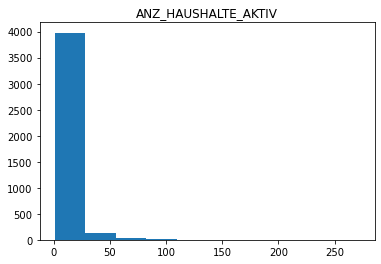

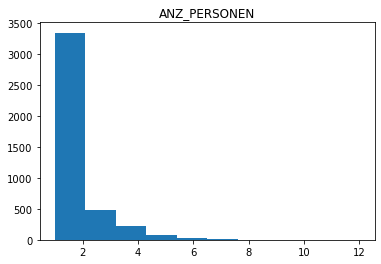

In [34]:
num_cols = get_features(feat_summary, 'numerical',azdias_transformed, )
print(num_cols)

for col in num_cols:
    fig, ax = plt.subplots()
    plt.hist(azdias_transformed[col])
    plt.title(col)

From the histogram of the data, we notice that data is not normal distributed. it is therefore decided to use the min_max scaler to scale 

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
azdias_transformed[num_cols] = scaler.fit_transform(azdias_transformed[num_cols])

In [36]:
ord_cols = get_features( feat_summary, 'ordinal',azdias_transformed)

In [37]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
azdias_transformed[ord_cols] = scaler.fit_transform(azdias_transformed[ord_cols])

In [38]:
azdias_transformed

,ANZ_HAUSHALTE_AKTIV,ANZ_PERSONEN,BALLRAUM,CAMEO_DEUG_2015,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,...,RETOURTYP_BK_S_5.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,VERS_TYP_2.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6
1,0.03690,0.090909,0.833333,0.875,0.4,1.00,1.00,0.00,1.00,0.75,...,0,0,0,1,1,0,0,0,1,0
2,0.03321,0.000000,0.166667,0.375,0.6,0.25,1.00,0.00,0.75,0.50,...,0,0,1,0,0,0,0,0,1,0
3,0.00000,0.000000,0.500000,0.125,0.2,0.25,0.25,0.75,0.25,0.00,...,0,1,0,0,0,0,1,0,0,0
4,0.00738,0.272727,0.166667,0.625,0.8,0.00,0.25,0.75,0.50,0.50,...,1,0,1,0,1,0,0,1,0,0
5,0.01476,0.000000,0.833333,0.875,0.2,0.25,1.00,0.50,0.00,0.25,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.00369,0.090909,0.166667,0.625,0.8,0.00,0.25,0.75,0.75,1.00,...,0,1,0,0,1,0,0,1,0,0
4996,0.00000,0.181818,0.666667,0.375,0.4,0.75,0.00,1.00,0.25,0.00,...,0,0,0,1,0,0,1,0,0,0
4997,0.00369,0.090909,0.000000,0.000,0.8,0.00,0.00,1.00,0.25,1.00,...,0,1,0,0,0,0,0,0,0,0
4998,0.00369,0.090909,0.833333,0.000,0.4,0.00,0.50,1.00,0.00,0.25,...,1,1,0,0,1,0,1,0,0,0


In [39]:
# for col in azdias_transformed.columns:
    
#     try:
#         plt.figure(figsize=(16, 8))
#         ax = sns.distplot(azdias_transformed[col])
#         ax.figure.savefig('./dist/{:}.png'.format(col))
#         plt.close()
#     except:
#         print('{} is not numeric'.format(col))

# Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## PCA

In [40]:
# azdias_transformed

In [41]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

# n_components = 360
pca = PCA()

azdias_pca = pca.fit_transform(azdias_transformed)

(-14.640000000000002, 100.0)

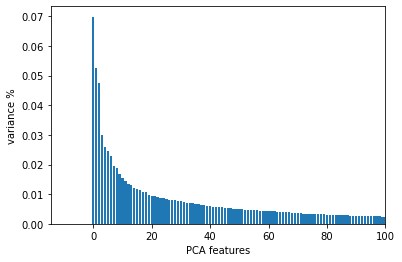

In [42]:
features = np.arange(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
# plt.xticks(features)
plt.xlim(right = 100)

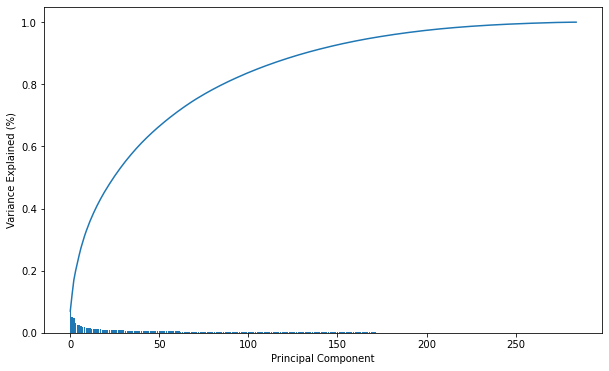

In [43]:
n_components = 300
ind = np.arange(pca.n_components_)
vals = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))

ax = plt.subplot()
cumvals = np.cumsum(vals)
ax.bar(ind, vals)
ax.plot(ind, cumvals)

for i in range(n_components):
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")

In [44]:
# Re-apply PCA to the data while selecting for number of components to retain.

n_components = features[cumvals > 0.90][0]  # determine the required principle componenth to retian 99% variance
pca = PCA(n_components)
azdias_pca = pca.fit_transform(azdias_transformed)

In [45]:
print("we will consider to include {:} PCA\'s in further analysis".format(n_components))

we will consider to include 132 PCA's in further analysis


## Interpretation of the PCA

In [46]:
pca_df = pd.DataFrame(pca.components_)
pca_df.columns = azdias_transformed.columns

In [47]:
pca_df

,ANZ_HAUSHALTE_AKTIV,ANZ_PERSONEN,BALLRAUM,CAMEO_DEUG_2015,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,...,RETOURTYP_BK_S_5.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,VERS_TYP_2.0,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6
0,0.014338,-0.019027,-0.062554,0.151132,0.116534,0.071000,0.139775,-0.157663,0.104859,0.022779,...,0.004229,0.008825,0.048001,-0.044712,0.030210,-0.023582,-0.010436,0.043449,0.053456,0.023899
1,0.009844,-0.010619,-0.146125,0.043910,0.178213,-0.083591,0.054966,-0.053431,0.006849,0.030060,...,0.086977,0.022389,-0.005350,0.013830,0.068488,-0.003889,0.024485,-0.026112,0.004159,0.013339
2,0.003187,-0.009832,-0.013362,0.029209,0.033490,-0.191791,0.084590,0.096323,-0.250523,-0.220960,...,0.203960,-0.077658,0.007291,0.116336,0.017662,-0.011712,0.288981,-0.149150,-0.082226,0.002009
3,0.000466,-0.002623,-0.027862,0.001584,0.025059,-0.162717,-0.040982,0.137230,-0.081337,-0.064876,...,0.086657,0.077599,-0.144388,-0.043900,-0.023619,-0.021116,-0.021289,-0.069311,-0.026090,0.036482
4,0.000473,-0.002850,0.026160,0.038808,-0.039098,-0.032927,-0.045474,0.059184,-0.041336,-0.093946,...,0.143283,0.066674,0.042231,-0.112669,0.219516,-0.016446,0.112238,-0.054231,-0.045398,0.031854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,-0.004098,-0.002556,-0.044828,-0.108799,0.002500,-0.016158,-0.029219,-0.003073,-0.008301,-0.001697,...,0.001547,0.032793,0.032845,-0.027216,-0.013171,-0.110352,0.028044,-0.003358,0.013533,0.050192
128,-0.003355,0.001160,0.207014,0.134143,0.018011,0.021390,0.027615,0.005131,0.006468,0.013096,...,0.017659,0.003953,0.007488,0.062480,0.070295,0.030527,0.000919,0.006504,-0.040511,-0.008555
129,-0.007863,-0.003554,-0.002380,-0.021350,-0.106682,0.008730,0.082523,-0.026218,-0.025887,0.029715,...,0.006810,0.023797,0.058368,0.020042,0.003602,0.055275,-0.040510,0.015889,0.072964,-0.007795
130,0.004206,0.001482,-0.094366,0.015102,0.007172,0.037839,0.098678,-0.020162,-0.018297,0.002955,...,0.005594,-0.018069,-0.026577,-0.004489,0.027905,0.017842,-0.016327,-0.028870,-0.016662,-0.026645


In [48]:
pca_df.loc[1].sort_values(ascending=False).iloc[:4].index

Index(['EWDICHTE', 'KBA13_HERST_BMW_BENZ', 'KBA13_SEG_SPORTWAGEN',
       'KBA13_SITZE_4'],
      dtype='object')

In [49]:
df_features = pd.read_excel(
    'DIAS Information Levels - Attributes 2017.xlsx', header=[1], usecols=[2, 3], index_col=[0])
df_features = df_features.reset_index()

In [50]:
def lookup_description(df_features, key):
    try:
        description = df_features.loc[df_features["Attribute"] == key, "Description"].values[0]
    except:
        # For dummied value, split and remove the suffix in the dummies 
        key = '_'.join(key.split("_")[:-1])
        description = df_features.loc[df_features["Attribute"] == key, "Description"].values[0]
    return description

In [51]:
## TO do, to analyze the weight of each PCA

In [52]:
for i in np.arange(1):
    print_pca( pca_df, i, 5)

PCA 0
5 attributes with the HIGHEST weight


,Attribute,Weight,Description
0,PLZ8_BAUMAX,0.183069,most common building-type within the PLZ8
1,PLZ8_ANTG4,0.181772,number of >10 family houses in the PLZ8
2,PLZ8_ANTG3,0.164538,number of 6-10 family houses in the PLZ8
3,HH_EINKOMMEN_SCORE,0.152105,estimated household_net_income
4,CAMEO_DEUG_2015,0.151132,CAMEO_4.0: uppergroup


5 attributes with the LOWEST weight


,Attribute,Weight,Description
0,MOBI_REGIO,-0.141595,moving patterns
1,KBA05_GBZ,-0.154915,number of buildings in the microcell
2,FINANZ_MINIMALIST,-0.157663,financial typology: low financial interest
3,KBA05_ANTG1,-0.171425,number of 1-2 family houses in the cell
4,LP_STATUS_GROB,-0.189625,social status rough


## clustering

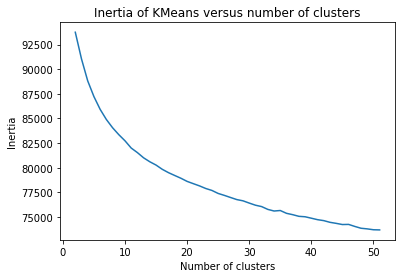

In [53]:
from sklearn.cluster import KMeans

clusters = 50

scores = [KMeans(n_clusters=i+2).fit(azdias_pca).inertia_ for i in range(clusters)]
sns.lineplot(np.arange(clusters) + 2, scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of KMeans versus number of clusters");

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001A87FF76438>,
                 k=None, model=None)

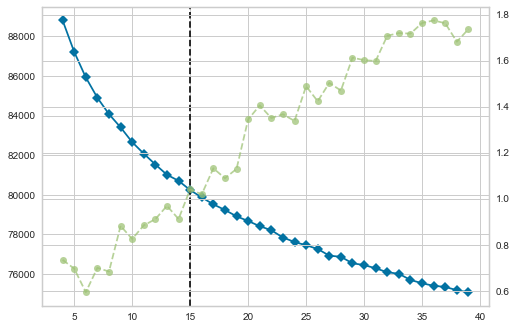

In [54]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 40))
visualizer.fit(azdias_pca)   

In [55]:
visualizer.elbow_value_

15

## pre-processing pipeline

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.compose import ColumnTransformer

#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureReduction( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feat_summary, nan_threshold, features_to_keep ):
        self._feat_summary = feat_summary
        self._nan_threshold = nan_threshold
        self._features_to_keep = features_to_keep
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return data_cleaning(X, self._feat_summary, self._nan_threshold, self._features_to_keep)

In [57]:
features_to_keep = azdias.columns.values

In [98]:
num_cols = get_features(feat_summary, typ="numerical", azdias=azdias)
cat_cols = get_features(feat_summary, typ="categorical", azdias=azdias)
ord_cols = get_features(feat_summary, typ="ordinal", azdias=azdias)

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', MinMaxScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

ord_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', MinMaxScaler())])

combined_pipe = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols),
        ('ord', ord_transformer, ord_cols)],
    sparse_threshold=0)

pre_processing = Pipeline(steps=[
('reduce_dimension', FeatureReduction(feat_summary, nan_threshold = 0.3, features_to_keep = features_to_keep)), 
('combined_pipe', combined_pipe)])

In [99]:
transformed_data = pre_processing.fit_transform(azdias)#combined_pipe.fit_transform(azdias)
cat_cols_transformed = pre_processing['combined_pipe'].transformers_[1][1]['onehot']\
                   .get_feature_names(cat_cols)
# df_clean = pd.DataFrame(transformed_data, columns= np.concatenate([num_cols, cat_cols_transformed, ord_cols]))

# step 1: drop attributes not explained in meta data file 
# step 2: replace missing values or unknowns as np.nan


In [100]:
transformed_data = pre_processing.fit_transform(customers)#combined_pipe.fit_transform(azdias)
cat_cols_transformed = pre_processing['combined_pipe'].transformers_[1][1]['onehot']\
                   .get_feature_names(cat_cols)
df_clean_customer = pd.DataFrame(transformed_data, columns= np.concatenate([num_cols, cat_cols_transformed, ord_cols]))

# step 1: drop attributes not explained in meta data file 
# step 2: replace missing values or unknowns as np.nan


## unsuperivised learning pipeline

In [101]:
pca_n = n_components 
n_clusters = 11

In [102]:
pipeline = Pipeline([('kmeans', KMeans(n_clusters=n_clusters))])

In [103]:
pipeline.fit(df_clean)
pop_cluster = pipeline.predict(df_clean)
cust_cluster = pipeline.predict(df_clean_customer)

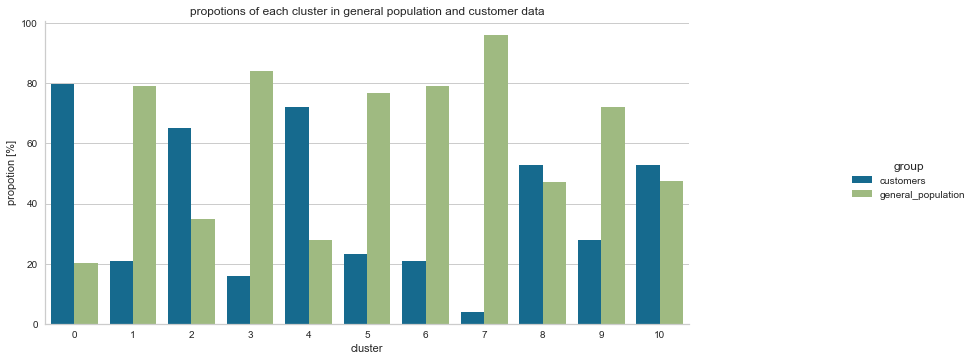

In [104]:
df_cust = pd.DataFrame()
df_cust['cluster'] = cust_cluster
df_cust['group'] = 'customers'

df_pop = pd.DataFrame()
df_pop['cluster'] = pop_cluster
df_pop['group'] = 'general_population'

df = pd.concat([df_cust, df_pop])

# sns.countplot(x ='cluster', hue = "group", data = df)
x, y = 'cluster', 'group'
df1 = df.groupby(x)[y].value_counts(normalize=True).mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y, kind='bar',data=df1)
g.fig.set_size_inches(15,5)

ax = g.axes.flatten()[0]
ax.set_ylabel('propotion [%]')
ax.set_title('propotions of each cluster in general population and customer data');

In [105]:
# Difference in percentage between two groups

In [106]:
df1.sort_values('cluster').groupby(by='group')['percent']

In [107]:
df1.pivot('cluster', 'group', 'percent')

group,customers,general_population
cluster,,
0,79.665190,20.334810
1,20.809249,79.190751
2,65.217391,34.782609
3,15.953307,84.046693
4,71.971496,28.028504
5,23.238095,76.761905
6,20.860927,79.139073
7,4.032258,95.967742
8,52.744630,47.255370


### difference between two data groups

In [69]:
df_diff = df1.pivot('cluster', 'group', 'percent').assign(diff = lambda x: x.customers - x.general_population).reset_index()

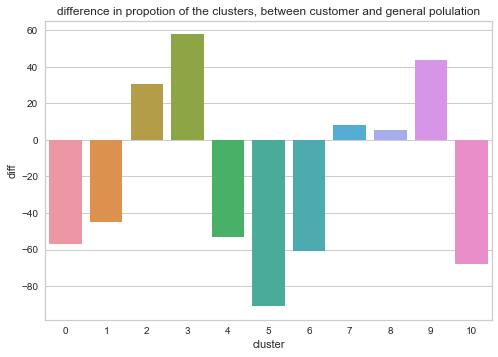

In [70]:
ax = sns.barplot(x = 'cluster', y = 'diff', data = df_diff)
ax.set_title('difference in propotion of the clusters, between customer and general polulation');

In [71]:
# extract distrance to center for the first 10 principle components
cluster_df = pd.DataFrame(pipeline.named_steps['kmeans'].cluster_centers_[:,:10])

In [72]:
# cluster centers shows how each gathers around for each centers at each dimension. meaning data points of this cluster will have a value close to the center of this diemnsion

### heatmap for pca

Text(52.0, 0.5, 'clusters')

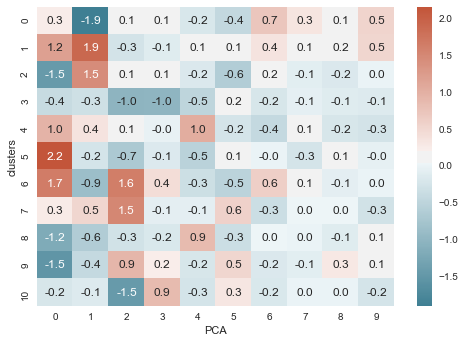

In [73]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
ax = sns.heatmap(cluster_df, annot=True, cmap = cmap,fmt='0.1f')
ax.axes.set_xlabel('PCA')
ax.axes.set_ylabel('clusters')

In [74]:
## How to further interprete it? Over presented? Underpresented? 

# Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [75]:
mailout_train = pd.read_csv('./data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', dtype = dtype)

In [83]:
# comapre two data set, get the names of columns in general population, but not in the training set
col_diff = [col for col in mailout_train.columns if col not in azdias.columns]
print(col_diff)

['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN', 'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'ARBEIT', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM', 'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL', 'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN', 'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_HANDWERK', 'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KONSUMTYP', 'D19_KONSUMTYP_MAX', 'D19_KOS

In [87]:
mailout_train.groupby(by ='RESPONSE')['RESPONSE'].count()/len(mailout_train)*100

n_records = len(mailout_train)
n_customer = (mailout_train['RESPONSE'] ==1).sum()
n_not_customer =  (mailout_train['RESPONSE'] ==0).sum()
n_na =  mailout_train["RESPONSE"].isna().sum()
customer_perc = n_customer/n_records*100

# Print the results
print("total records: {:}".format(n_records))
print("who became customers: {:}".format(n_customer))
print("who did not become customers: {:}".format(n_not_customer))
print("na\'s in the RESPONSE column: {:}".format(n_na))
print("ratio who became a customer: {:0.2f}%".format(customer_perc))

total records: 42962
who became customers: 532
who did not become customers: 42430
na's in the RESPONSE column: 0
ratio who became a customer: 1.24%


In [130]:
transformed_data = pre_processing.fit_transform(mailout_train)#combined_pipe.fit_transform(azdias)
cat_cols_transformed = pre_processing['combined_pipe'].transformers_[1][1]['onehot']\
                   .get_feature_names(cat_cols)
df_clean_customer = pd.DataFrame(transformed_data, columns= np.concatenate([num_cols, cat_cols_transformed, ord_cols]))

# step 1: drop attributes not explained in meta data file 
# step 2: replace missing values or unknowns as np.nan


In [173]:
df_clean_customer.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_PERSONEN', 'ALTERSKATEGORIE_GROB_2',
       'ALTERSKATEGORIE_GROB_3', 'ALTERSKATEGORIE_GROB_4',
       'ALTERSKATEGORIE_GROB_9', 'ANREDE_KZ_2', 'CJT_GESAMTTYP_2.0',
       'CJT_GESAMTTYP_3.0', 'CJT_GESAMTTYP_4.0',
       ...
       'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV',
       'SEMIO_VERT', 'WOHNDAUER_2008', 'WOHNLAGE', 'W_KEIT_KIND_HH',
       'RESPONSE'],
      dtype='object', length=286)

In [166]:
# mailout_train_pca = pca.fit_transform(df_clean_customer)

In [169]:
# df_mailout_train_clean = pd.DataFrame(data=mailout_train_pca)
df_mailout_train_clean = df_clean_customer.copy()
df_mailout_train_clean['RESPONSE'] = mailout_train['RESPONSE']

In [179]:
pre_processing = Pipeline(steps=[
('reduce_dimension', FeatureReduction(feat_summary, nan_threshold = 0.6, features_to_keep = features_to_keep)), 
('combined_pipe', combined_pipe)])

In [180]:
df_mailout_train_clean.to_pickle('mail_out_cleaned_no_pca.pkl')

# Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')